In [5]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
import category_encoders as ce

In [7]:
data = pd.read_csv("diabetes.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = data.drop(['Outcome'], axis=1)

y = data['Outcome']

In [11]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [12]:

X_train.shape, X_test.shape

((514, 8), (254, 8))

In [13]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier(max_depth=12, random_state=100)


# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=100)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7244094488188977

confusion Metrics

[[ 58  28]
 [ 42 126]]


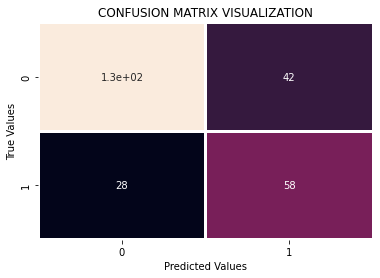

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred,labels=[1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

Recall, Precision, F-Score

F1 SCORE

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.6236559139784946

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       168
           1       0.58      0.67      0.62        86

    accuracy                           0.72       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.74      0.72      0.73       254



In [50]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

9.51869264069219